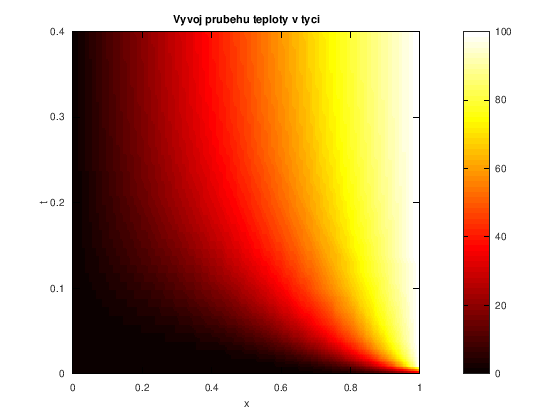

In [3]:
% Rovnice vedeni tepla pro jednorozmernou tyc s fixovanymi teplotami na koncich a konstantni pocatecni teplotou.
% Teplota se v tyci rozlozi rovnomerne (linearni profil).
% Teplotni profil pred dosazenim rovnovazenho stavu pro ruzne casy ziskame z rovnice vedeni tepla.
% Nize je aproximace reseni pomoci konecnych diferenci

L=1;tf=0.4;
a=@(t) 0;
b=@(t) 100;
g=@(x) 0;
dt=0.01;
dx=0.01;
alpha=dt/dx^2;
nx=L/dx;
nt=tf/dt;
t1=0:dt:tf;
x1=0:dx:L;
u=zeros(nt+1,nx+1);
u(:,1)=a(t1');
u(:,end)=b(t1');
u(1,:)=g(x1);

%------------------------
%We observe the equation (1) is in form_ A*u(t,x)=-u(t-1,x)
%A is (nx+1,nx+1) size square natrix
A=eye(nx+1);
for i=2:nx
    A(i,i-1:i+1)=[alpha -1-2*alpha alpha];
end

% u(t,x) is deternuned sequentially
for i=2:nt+1
    B=-u(i-1,:)';
        B(1)=u(i,1);
        B(end)=u(i,end);

        u1 =(A\B)'; 
    u(i,2:nx) =u1(2:nx); 
end
%---------------------
%Plotting the results.

X1=kron(ones(nt+1,1),x1);
T1=kron(ones(1,nx+1),t1');
colormap hot
pcolor(X1,T1,u)

shading interp
colorbar
title('Vyvoj prubehu teploty v tyci')
xlabel('x')
ylabel('t')
zlabel('u')